# Spectral 2

In [32]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation

In [35]:
%matplotlib notebook

## Problem 1

Consider again the function $u(x) = \sin^2 (x) \cos(x) +e^{2\sin(x+1)}$.
Create a function that approximates $\frac{1}{2}u''-u'$ on the Fourier grid points for $N=24$. Plot the approximation as well as the analytic solution.

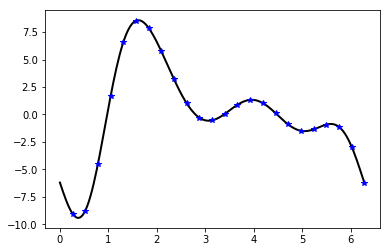

In [4]:
N=24
x1 = (2.*np.pi/N)*np.arange(1,N+1)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))
# This array is reordered in Python to
# accomodate the ordering inside the fft function in scipy.
k = np.concatenate(( np.arange(0,N/2) ,
                     np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                     np.arange(-N/2+1,0,1) ))
# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fpp_hat = ((1j*k)*fp_hat)
fp = np.real(ifft(fp_hat))
fpp = np.real(ifft(fpp_hat))
# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
fp_analytic = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
              )
fpp_analytic = (2*np.cos(x2)**3. -
                7*np.sin(x2)**2.*np.cos(x2) -
                2*np.sin(x2+1)*np.exp(2*np.sin(x2+1)) +
                4*np.cos(x2+1)**2*np.exp(2*np.sin(x2+1))
               )

solution = (1/2)*fpp - fp
solution_analytic = (1/2)*fpp_analytic - fp_analytic
plt.plot(x2,solution_analytic,'-k',linewidth=2.)
plt.plot(x1,solution,'*b')
plt.show()

## Problem 2

Use `scipy.integrate.odeint` to solve the initial value problem 
	\begin{align}
		u_t +c(x) u_x = 0,
	\end{align}
where $c(x) = .2 + \sin^2(x-1)$, and $u(x,t=0) = e^{-100(x-1)^2}.$ Use the method given in the lab to rewrite the problem as a system of ODEs.
Animate your numerical solution from $t = 0$ to $t = 8$ (and $x \in [0,2\pi]$) over 150 time steps and 100 $x$ steps.

In [19]:
N=100
x = (2.*np.pi/N)*np.arange(0,N)
k = np.concatenate(( np.arange(0,N/2) ,
                     np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                     np.arange(-N/2+1,0,1) ))
t = np.linspace(0, 8, 150)
u0_x = lambda x: np.exp(-100*(x-1)**2)
c_x = lambda x: .2 + np.sin(x-1)**2
c = c_x(x)
u0 = u0_x(x)

In [23]:
def advection(u, t, c):
    return -c * np.real(ifft((1j*k)*fft(u)))
sol = odeint(advection, u0, t, args=(c,))

<IPython.core.display.Javascript object>


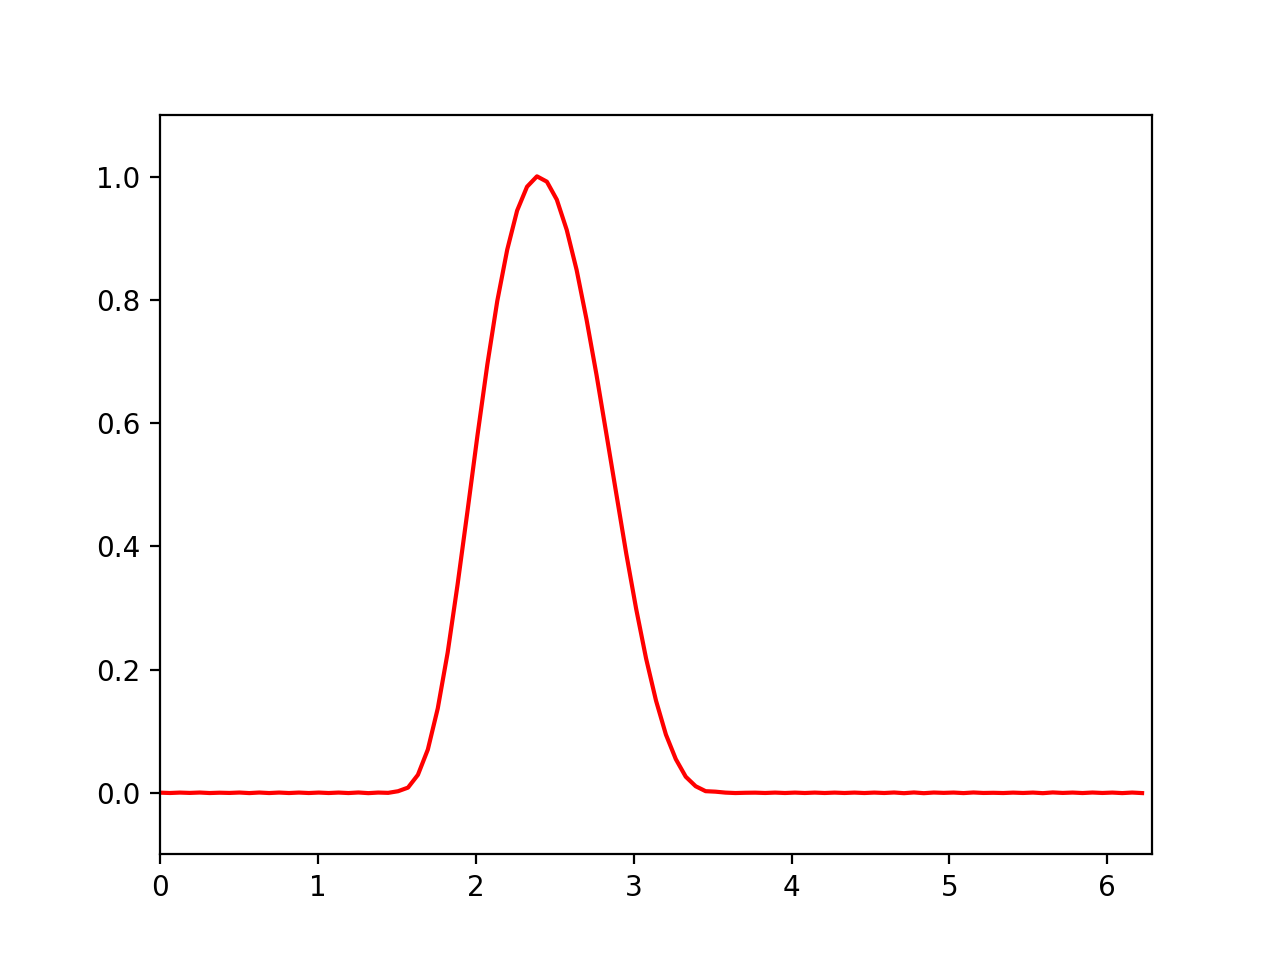

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-0, 2*np.pi))
ax.set_ylim((-0.1, 1.1))
particle, = plt.plot([],[], marker='o', color='r')
traj, = plt.plot([],[], color='r')

def update(i):
    traj.set_data(x, sol[i])
    return particle, traj

ani = animation.FuncAnimation(fig, update, frames=range(150), interval=5)
plt.show()
